In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [5]:
# loading the csv data to a Pandas DataFrame
silver_data = pd.read_csv('gld_price_data.csv')

In [6]:
# print first 5 rows in the dataframe
silver_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [7]:
# print last 5 rows of the dataframe
silver_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [8]:
# number of rows and columns
silver_data.shape

(2290, 6)

In [9]:
# getting some basic informations about the data
silver_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [10]:
# checking the number of missing values
silver_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [11]:
# getting the statistical measures of the data
silver_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation:
1. Positive Correlation
2. Negative Correlation

In [12]:
correlation = silver_data.corr()

C:\Users\91892\AppData\Local\Temp\ipykernel_8504\660943657.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = silver_data.corr()


<AxesSubplot:>

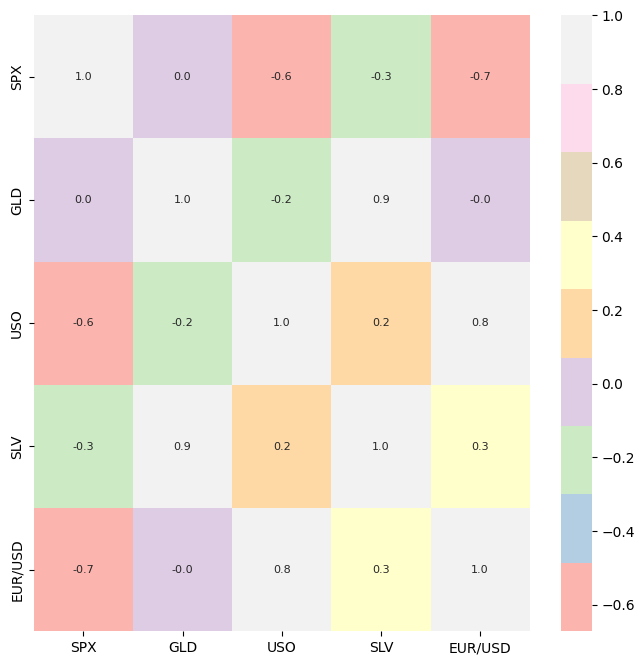

In [13]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=False, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Pastel1')

In [14]:
# correlation values of SLV
print(correlation['SLV'])

SPX       -0.274055
GLD        0.866632
USO        0.167547
SLV        1.000000
EUR/USD    0.321631
Name: SLV, dtype: float64


C:\Users\91892\AppData\Local\Temp\ipykernel_8504\4177042700.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(silver_data['SLV'],color='blue')


<AxesSubplot:xlabel='SLV', ylabel='Density'>

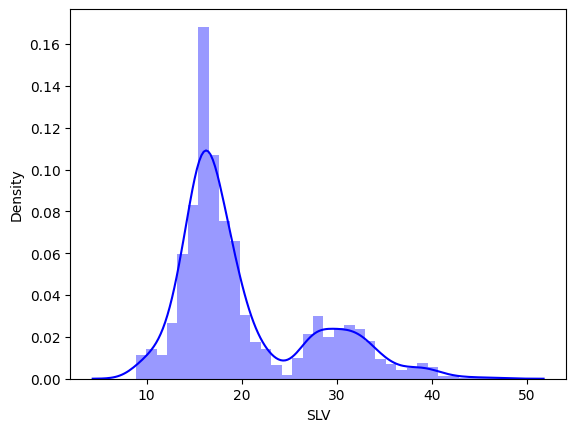

In [15]:
# checking the distribution of the SLV Price
sns.distplot(silver_data['SLV'],color='blue')

Splitting the Features and Target

In [16]:
X = silver_data.drop(['Date','SLV'],axis=1)
Y = silver_data['SLV']

In [17]:
print(X)

              SPX         GLD        USO   EUR/USD
0     1447.160034   84.860001  78.470001  1.471692
1     1447.160034   85.570000  78.370003  1.474491
2     1411.630005   85.129997  77.309998  1.475492
3     1416.180054   84.769997  75.500000  1.468299
4     1390.189941   86.779999  76.059998  1.557099
...           ...         ...        ...       ...
2285  2671.919922  124.589996  14.060000  1.186789
2286  2697.790039  124.330002  14.370000  1.184722
2287  2723.070068  125.180000  14.410000  1.191753
2288  2730.129883  124.489998  14.380000  1.193118
2289  2725.780029  122.543800  14.405800  1.182033

[2290 rows x 4 columns]


In [18]:
print(Y)

0       15.1800
1       15.2850
2       15.1670
3       15.0530
4       15.5900
         ...   
2285    15.5100
2286    15.5300
2287    15.7400
2288    15.5600
2289    15.4542
Name: SLV, Length: 2290, dtype: float64


Splitting into Training data and Test Data

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

Model Training: Random Forest Regressor

In [20]:
regressor = RandomForestRegressor(n_estimators=100)

In [21]:
# training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model Evaluation

In [22]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [23]:
print(test_data_prediction)

[32.68159987 13.89265999 14.5557     18.45359992 17.24209986 26.47300022
 35.40769996 16.76629974 16.87560026 19.93779981 15.7638     36.01909956
 22.99470003 32.79429904 15.98629977 16.6482001  28.88439935 32.50289977
 30.15879946 34.17820137 27.57369991 20.07049958 41.57230086 38.95509947
 16.11569964 14.5349     11.32116    18.78760014 16.56219975 31.85339993
 12.2036     16.11470011 17.36118036 14.44919999 18.17590014 28.02820026
 16.09019992 15.44559998 27.99620001 14.2518     15.52730007 16.88652006
 15.58669999 17.5822003  29.23149949 19.17689965 13.9323     14.1426
 18.26218001 20.23619981  9.3129     15.4488     16.68209988 14.8813
 15.69499997 18.66980014 29.8968997  37.4267993  44.57800086 16.25707966
 18.09542982 16.33228971 13.2304     14.9716     15.83179997 21.02599977
 34.2182003  16.14329997 15.92929999 16.13788004 32.01330006 39.24099976
 23.33239973 18.58679959 18.77889984 19.26339985 15.88549996 15.92839991
 14.0658     18.84559992 16.21669988 16.91369952 18.5710998

In [24]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9936416572620442


Compare the Actual Values and Predicted Values in a Plot

In [25]:
Y_test = list(Y_test)

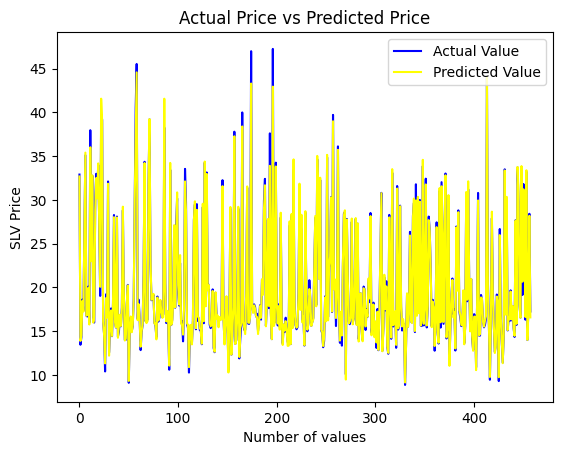

In [26]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='yellow', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('SLV Price')
plt.legend()
plt.show()

building a predictive system

In [27]:
input_data = (1416.25,89.54, 74.25, 1.4869)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is USD ', prediction[0])

[16.4845507]
The insurance cost is USD  16.48455070000002


c:\Users\91892\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
